## Restaurant Reviews - Sentiment Analysis  | Natural Language Processing 

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Importing Dataset

In [6]:
dataset = pd.read_csv('Dataset/restaurant_reviews.tsv', sep='\t', quoting=3)
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


#### Exploratory Data

In [9]:
dataset['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

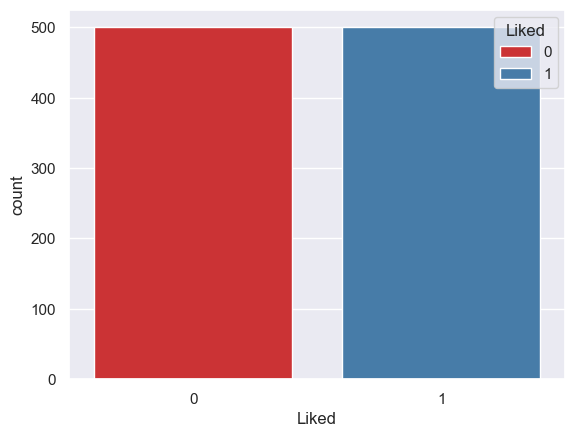

In [12]:
sns.countplot(x='Liked', data=dataset, palette='Set1', hue='Liked')

In [14]:
dataset['Review'].apply(len).max(), dataset['Review'].apply(len).min()

(149, 11)

In [15]:
dataset['Review Length'] = dataset['Review'].apply(len)

dataset

,Review,Liked,Review Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [27]:
dataset['Review Length'].idxmax()

dataset.iloc[dataset['Review Length'].idxmax()]

Review           The problem I have is that they charge $11.99 ...
Liked                                                            0
Review Length                                                  149
Name: 985, dtype: object

In [28]:
dataset.iloc[dataset['Review Length'].idxmax()]['Review']

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [59]:
dataset.groupby('Liked').describe()

Review Length                                                   
              count   mean        std   min    25%   50%    75%    max
Liked                                                                 
0             500.0  60.75  34.224935  11.0  33.00  52.5  84.00  149.0
1             500.0  55.88  30.219464  11.0  32.75  49.5  73.25  148.0

#### Preprocessing Data - (NLTK Text Data Cleaning)

In [31]:
### Example

# He plays well!
# He plays well 
# He play well
# "He" "play" "good"

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
dataset['Review'][0]

'Wow... Loved this place.'

In [36]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Amr
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
dataset['Review'][0].lower().split()

['wow...', 'loved', 'this', 'place.']

In [42]:
import re
re.sub('[^a-zA-Z]',' ',dataset['Review'][0])

'Wow    Loved this place '

In [44]:
re.sub('[^a-zA-Z]',' ',dataset['Review'][0]).lower().split()

['wow', 'loved', 'this', 'place']

In [45]:
temp = []
for word in (re.sub('[^a-zA-Z]',' ',dataset['Review'][0]).lower().split()):
    if word not in stopwords.words('english'):
        temp.append(word)

temp

['wow', 'loved', 'place']

In [ ]:
#[word for word in s if word not in stopwords.words('english')]

In [50]:
s = ' '.join(temp)   
s 

'wow loved place'

In [55]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [56]:
ps.stem(s)

'wow loved plac'

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
cv.fit_transform(s.split()).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=int64)

#### Preprocessing Data - (Putting all the above together)

In [58]:
corpus = []
for i in range(len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    review = ps.stem(review)
    corpus.append(review)

corpus

['wow loved plac',
 'crust good',
 'tasty texture nasti',
 'stopped late may bank holiday rick steve recommendation lov',
 'selection menu great pric',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warm',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpr',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommend',
 'waitress little slow servic',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amaz',
 'service also cut',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm sever running around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger fries beer dec

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
X.shape

(1000, 1994)

In [65]:
y = dataset['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

#### Splitting Data - (Training and Testing)

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#### Model Building - (Naive Bayes Classifier)

In [71]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy_score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[116  57]
 [ 32 125]]
accuracy_score: 0.7303030303030303
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       173
           1       0.69      0.80      0.74       157

    accuracy                           0.73       330
   macro avg       0.74      0.73      0.73       330
weighted avg       0.74      0.73      0.73       330



#### Model Deployment & Production

In [73]:
import joblib
joblib.dump(classifier, 'restaurant-model.pkl')

['restaurant-model.pkl']

In [74]:
joblib.load('restaurant-model.pkl')

MultinomialNB()